In [93]:
import numpy as np
import matplotlib.pyplot as plt

[a b c ...] <-> a+bx+cx^2

In [94]:
def evaluetePol(coeff, x):
    result = 0
    for i, c in enumerate(coeff):
        result += c * x ** i
    return result

In [537]:
def f(x):
    return np.cos(x + 0.5)

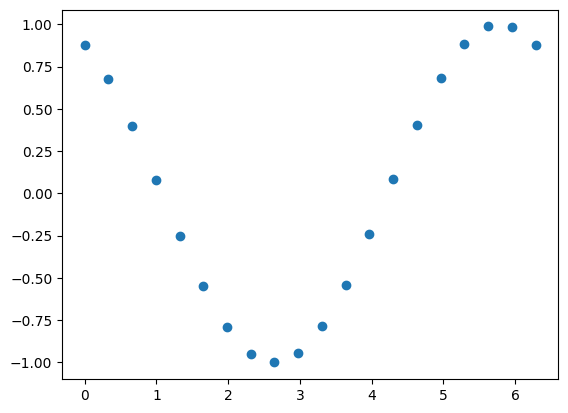

In [538]:
x = np.linspace(0, 2*np.pi,20)

y = f(x)

plt.scatter(x,y)


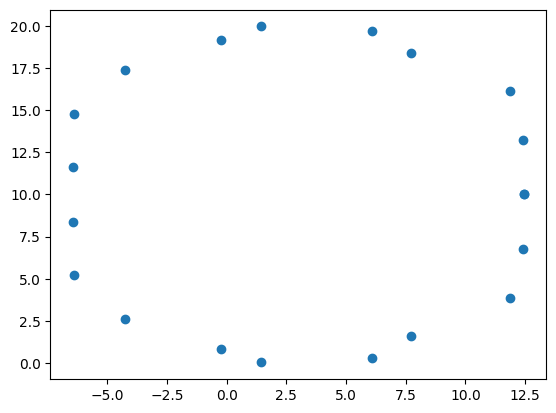

In [575]:
#points = np.array([(a,b) for a,b in zip(x, y)])
NOISE_RANGE = 0
RADIUS = 10
thetas = np.linspace(0, 2*np.pi,20)
points = np.array([(RADIUS*np.cos(theta) + np.random.random()*NOISE_RANGE + np.sin(RADIUS*np.cos(theta))+ 3, RADIUS*(np.sin(theta) + 1)+ np.random.random()*NOISE_RANGE) for theta in thetas])
x,y = points[:,0], points[:,1]
plt.scatter(x, y)
plt.show()
#np.random.shuffle(points)

In [576]:
DEG = 5
curve = np.random.rand(2, DEG + 1)

In [577]:
ts = np.random.rand(len(points))

In [578]:
def evalueteCurve(ts, curve, points):
    result = 0
    for point, t in zip(points, ts):
        for i, coeff in enumerate(curve):
            result += (point[i] - evaluetePol(coeff, t))**2
    return result

In [579]:
DT = 0.001
def computeGradientTs(ts, curve, points):
    gradient = []
    base = evalueteCurve(ts, curve, points)
    for i, t in enumerate(ts):
        newTs = np.copy(ts)
        newTs[i] += DT
        df = evalueteCurve(newTs, curve, points)
        gradient.append((df- base)/DT)
    return np.array(gradient)

In [580]:
STEP_SIZE = 0.001

def updateTs(ts, gradient):
    return np.add(ts, -gradient * STEP_SIZE)

In [581]:
def computeGradientCurve(ts, curve, points):
    gradient = []
    base = evalueteCurve(ts, curve, points)
    for i, coeff in enumerate(curve):
        gradient.append([])
        for j, c in enumerate(coeff):
            newCurve = np.copy(curve)
            newCurve[i][j] += DT
            df = evalueteCurve(ts, newCurve, points)
            gradient[i].append((df- base)/DT)
    return np.array(gradient)

In [582]:
def updateCurve(curve, gradient):
    return np.add(curve, -gradient*STEP_SIZE)

In [583]:
losses=[]

for _ in range(1000):
    curveGradient = computeGradientCurve(ts, curve, points)
    curve = updateCurve(curve, curveGradient)

    tsGradient = computeGradientTs(ts, curve, points)
    ts = updateTs(ts, tsGradient)

    loss = evalueteCurve(ts, curve, points)
    print(_, loss)
    losses.append(loss)

print(curve)

0 3384.1699782302967
1 3061.9366638711926
2 2709.037712596679
3 2052.8231838786837
4 1963.1865745254652
5 1980.819080018807
6 1797.4028463529899
7 1718.7758699345995
8 1601.8502669470142
9 1438.9557752892533
10 1435.5911214209502
11 1242.5262554204664
12 1216.1599597099782
13 1224.941770224358
14 1138.910002996176
15 1153.848877130892
16 1098.7922090029479
17 1095.451384342353
18 1107.3323341691153
19 1089.093341596535
20 1084.5546877067843
21 1073.2305976518103
22 1067.8432454647327
23 1062.5577946424298
24 1059.7106803040058
25 1057.697954863808
26 1056.2325405264417
27 1055.267698016833
28 1054.353279982774
29 1053.7117713582643
30 1053.0108234920583
31 1052.4697696002183
32 1051.8603076939346
33 1051.3479865049983
34 1050.7789624869486
35 1050.2518108237139
36 1049.6815501726905
37 1049.0888006004802
38 1048.4647116747196
39 1047.7398354642494
40 1046.9952508502668
41 1046.0583597848488
42 1045.0914705958994
43 1043.8093181962263
44 1042.311718832018
45 1040.1076824746635
46 1036.8

C:\Users\Paolo\AppData\Local\Temp\ipykernel_17012\2979590806.py:5: RuntimeWarning: overflow encountered in double_scalars
  result += (point[i] - evaluetePol(coeff, t))**2
C:\Users\Paolo\AppData\Local\Temp\ipykernel_17012\321870541.py:10: RuntimeWarning: invalid value encountered in double_scalars
  gradient[i].append((df- base)/DT)


145 nan
146 nan
147 nan
148 nan
149 nan
150 nan
151 nan
152 nan
153 nan
154 nan
155 nan
156 nan
157 nan
158 nan
159 nan
160 nan
161 nan
162 nan
163 nan
164 nan
165 nan
166 nan
167 nan
168 nan
169 nan
170 nan
171 nan
172 nan
173 nan
174 nan
175 nan
176 nan
177 nan
178 nan
179 nan
180 nan
181 nan
182 nan
183 nan
184 nan
185 nan
186 nan
187 nan
188 nan
189 nan
190 nan
191 nan
192 nan
193 nan
194 nan
195 nan
196 nan
197 nan
198 nan
199 nan
200 nan
201 nan
202 nan
203 nan
204 nan
205 nan
206 nan
207 nan
208 nan
209 nan
210 nan
211 nan
212 nan
213 nan
214 nan
215 nan
216 nan
217 nan
218 nan
219 nan
220 nan
221 nan
222 nan
223 nan
224 nan
225 nan
226 nan
227 nan
228 nan
229 nan
230 nan
231 nan
232 nan
233 nan
234 nan
235 nan
236 nan
237 nan
238 nan
239 nan
240 nan
241 nan
242 nan
243 nan
244 nan
245 nan
246 nan
247 nan
248 nan
249 nan
250 nan
251 nan
252 nan
253 nan
254 nan
255 nan
256 nan
257 nan
258 nan
259 nan
260 nan
261 nan
262 nan
263 nan
264 nan
265 nan
266 nan
267 nan
268 nan
269 nan


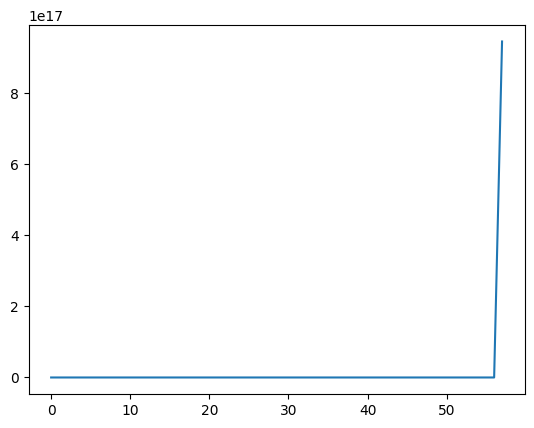

In [584]:
plt.plot(range(len(losses)), losses)

In [585]:
Ts = np.linspace(min(ts),max(ts),100)

evPoints = np.array([[evaluetePol(curve[0], t), evaluetePol(curve[1], t)] for t in Ts])

tsPoints = np.array([[evaluetePol(curve[0], t), evaluetePol(curve[1], t)] for t in ts])

x, y = points.T[0], points.T[1]
xs, ys = evPoints.T[0], evPoints.T[1]
txs, tys = tsPoints.T[0], tsPoints.T[1]

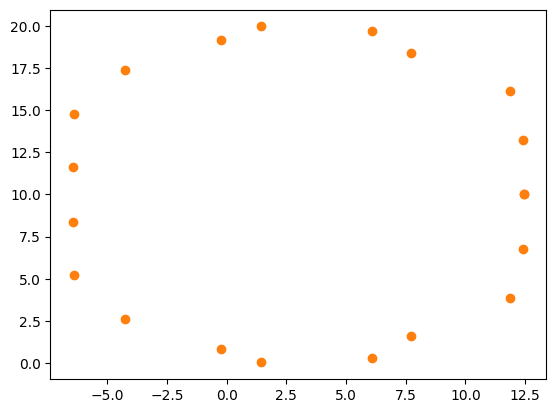

In [586]:
plt.plot(xs, ys)
plt.scatter(txs, tys)
plt.scatter(x, y)
plt.show()

In [587]:
import numpy as np
from scipy.special import comb

def get_bezier_parameters(X, Y, degree=3):
    """ Least square qbezier fit using penrose pseudoinverse.

    Parameters:

    X: array of x data.
    Y: array of y data. Y[0] is the y point for X[0].
    degree: degree of the Bézier curve. 2 for quadratic, 3 for cubic.

    Based on https://stackoverflow.com/questions/12643079/b%C3%A9zier-curve-fitting-with-scipy
    and probably on the 1998 thesis by Tim Andrew Pastva, "Bézier Curve Fitting".
    """
    if degree < 1:
        raise ValueError('degree must be 1 or greater.')

    if len(X) != len(Y):
        raise ValueError('X and Y must be of the same length.')

    if len(X) < degree + 1:
        raise ValueError(f'There must be at least {degree + 1} points to '
                         f'determine the parameters of a degree {degree} curve. '
                         f'Got only {len(X)} points.')

    def bpoly(n, t, k):
        """ Bernstein polynomial when a = 0 and b = 1. """
        return t ** k * (1 - t) ** (n - k) * comb(n, k)
        #return comb(n, i) * ( t**(n-i) ) * (1 - t)**i

    def bmatrix(T):
        """ Bernstein matrix for Bézier curves. """
        return np.matrix([[bpoly(degree, t, k) for k in range(degree + 1)] for t in T])

    def least_square_fit(points, M):
        M_ = np.linalg.pinv(M)
        return M_ * points

    T = np.linspace(0, 1, len(X))
    M = bmatrix(T)
    points = np.array(list(zip(X, Y)))
    
    final = least_square_fit(points, M).tolist()
    final[0] = [X[0], Y[0]]
    final[len(final)-1] = [X[len(X)-1], Y[len(Y)-1]]
    return final

[[  12.45597889   10.        ]
 [  12.63082921   16.2814637 ]
 [  21.11201054   22.57769913]
 [ -40.88922286   25.3629647 ]
 [  63.29961399   21.45713084]
 [-104.13361648   10.        ]
 [  63.29961399   -1.45713084]
 [ -40.88922286   -5.3629647 ]
 [  21.11201054   -2.57769913]
 [  12.63082921    3.7185363 ]
 [  12.45597889   10.        ]]


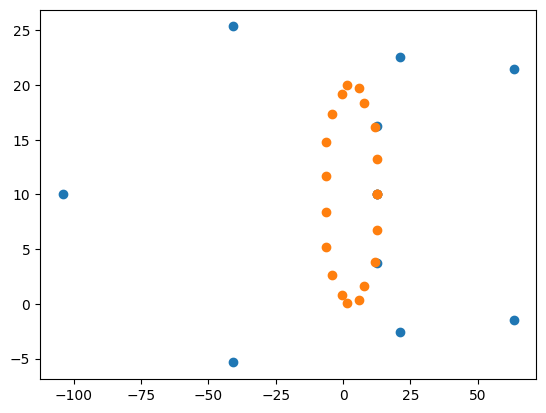

In [588]:
controls = np.array(get_bezier_parameters(x, y, 10))
print(controls)
contX, contY = controls.T[0], controls.T[1]
plt.scatter(contX, contY)
plt.scatter(x, y)
plt.show()

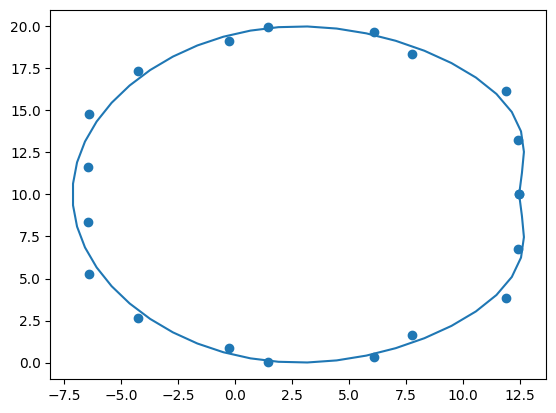

In [589]:
def bernstein_poly(i, n, t):
    """
     The Bernstein polynomial of n, i as a function of t
    """
    return comb(n, i) * ( t**(n-i) ) * (1 - t)**i


def bezier_curve(points, nTimes=50):
    """
       Given a set of control points, return the
       bezier curve defined by the control points.

       points should be a list of lists, or list of tuples
       such as [ [1,1], 
                 [2,3], 
                 [4,5], ..[Xn, Yn] ]
        nTimes is the number of time steps, defaults to 1000

        See http://processingjs.nihongoresources.com/bezierinfo/
    """

    nPoints = len(points)
    xPoints = np.array([p[0] for p in points])
    yPoints = np.array([p[1] for p in points])

    t = np.linspace(0.0, 1.0, nTimes)

    polynomial_array = np.array([ bernstein_poly(i, nPoints-1, t) for i in range(0, nPoints)   ])

    xvals = np.dot(xPoints, polynomial_array)
    yvals = np.dot(yPoints, polynomial_array)

    return xvals, yvals

bpoints = bezier_curve(controls)
plt.plot(bpoints[0], bpoints[1])
plt.scatter(x, y)
plt.show()

In [590]:
xDeg = 2
xBasis = [lambda x : np.power(x, d) for d in range(2, xDeg + 1)] + [lambda x : np.ones(x.shape), lambda x : x] + [np.sin, np.cos]
XMatrix = np.concatenate([np.array([f(x)]).T for f in xBasis], axis=1)

yDeg = 2
yBasis = [lambda y : np.power(y, d) for d in range(2, yDeg + 1)]  + [np.sin, np.cos]
yMatrix = np.concatenate([np.array([f(y)]).T for f in yBasis], axis=1)

In [591]:
A = np.concatenate([XMatrix, yMatrix], axis=1)
Y = np.array([y]).T

In [592]:
A_inv = np.linalg.pinv(A)
coeffs = A_inv@Y
print(coeffs)

[[ 0.04915514]
 [-0.43834228]
 [-0.28982454]
 [ 1.0718799 ]
 [ 1.18269261]
 [ 0.04989029]
 [-0.05425443]
 [-0.07946948]]


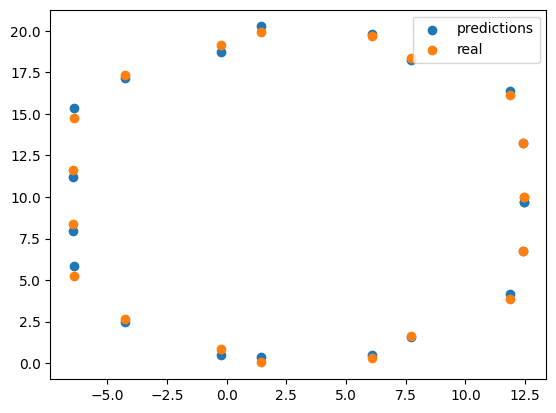

In [593]:
pred = A@coeffs
plt.scatter(x, pred, label='predictions')
plt.scatter(x, y, label='real')
plt.legend()
plt.show()

In [594]:
def getValue(x, y):
    return sum([coeffs[i][0]*base(x) for i, base in enumerate(xBasis)]) + sum([coeffs[i + len(xBasis)][0]*base(y) for i, base in enumerate(yBasis)]) - y

getValue(np.array([0, 1]),np.array([0, 1]))

array([ 0.66488086, -0.17674509])

(260, 249)


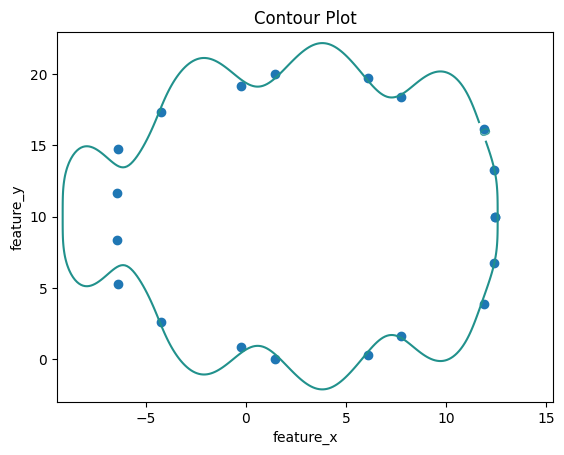

In [595]:
feature_x = np.arange(min(x) - 3, max(x) + 3, 0.1)
feature_y = np.arange(min(y) - 3, max(y) + 3, 0.1)
  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x, feature_y)
  
fig, ax = plt.subplots(1, 1)
  
print((np.cos(X / 2) + np.sin(Y / 4)).shape)
Z = getValue(X, Y)
  
# plots contour lines
CS = ax.contour(X, Y, Z, levels = 0)
ax.clabel(CS, inline=True, fontsize=10)

ax.scatter(x, y)
  
ax.set_title('Contour Plot')
ax.set_xlabel('feature_x')
ax.set_ylabel('feature_y')
  
plt.show()